In [1]:
import pysal as ps
import scipy.sparse as spar
from scipy import stats as st
import numpy as np
import sklearn.metrics.pairwise as skm
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import copy
import pandas as pd
%matplotlib inline

In [2]:
df = gpd.read_file('./cb_2015_us_county_500k_2.geojson')
W = ps.weights.Rook.from_dataframe(df)

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 9 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 11, 79, 671, 697, 725, 1061, 1217, 1221, 3199
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [3]:
df.crs = {'init':'epsg:4236', 'no_defs':True}

In [4]:
df = df.to_crs(epsg=5070)

In [5]:
df.drop(W.islands,inplace=True)
W = ps.weights.Rook.from_dataframe(df)

In [6]:
df['pct_old'] = df.male_over_85 / df.total_pop
df['log_pop'] = np.log(df.total_pop)

In [7]:
attributes = ['log_pop','pct_old','median_income']

In [8]:
contig = df.query('statefp not in ("02", "15", "72")') #filter out PR, AK, HI
W_contig = ps.weights.Rook.from_dataframe(contig)

In [9]:
#contig.plot(linewidth=0)

In [10]:
Xmat = df[attributes].values
Xmat = (Xmat - Xmat.mean(axis=0)) / Xmat.std(axis=0)

In [11]:
Xc = contig[attributes].values
Xc = (Xc - Xc.mean(axis=0)) / Xc.std(axis=0)

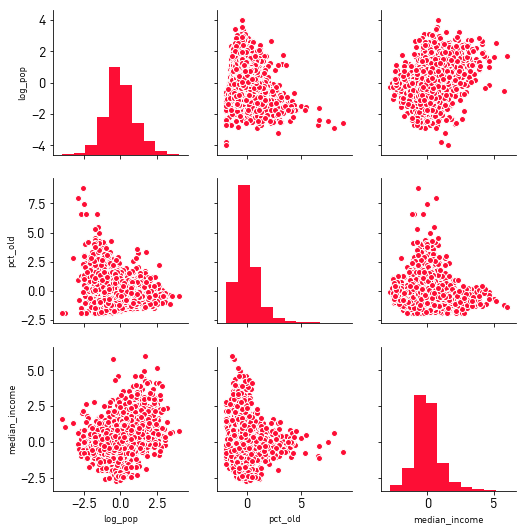

In [12]:
sns.pairplot(pd.DataFrame(Xmat,columns=attributes))

In [40]:
import imp
import skater
imp.reload(skater)

<module 'skater' from '/home/ljw/Dropbox/dev/bounder/skater.py'>

In [41]:
skater_ = skater.Spanning_Forest()

In [65]:
skater_ = skater_.fit(np.inf, W=W_contig, data=Xc, quorum = 100, trace=True) # if you want to find all available clusters above the quorum
sk8r = skater.Spanning_Forest().fit(8, W=W_contig, data=Xc, quorum = 100, trace=True) # if you want to find exactly n clusters

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: MSF contains no valid moves after finding 23 subtrees.Decrease the size of your quorum to find the remaining inf subtrees.
  """Entry point for launching an IPython kernel.


In [66]:
skater_._elapsed_time, sk8r._elapsed_time

(74.87517642974854, 23.492233514785767)

In [44]:
skater_.minimum_spanning_forest_

<3105x3105 sparse matrix of type '<class 'numpy.float64'>'
	with 3082 stored elements in Compressed Sparse Row format>

In [45]:
skater_._trace

[(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=nan, out_node=nan, score=inf)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2191, out_node=2157, score=6644.751563742393)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=1852, out_node=2469, score=6389.803002848775)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2116, out_node=1850, score=6315.725175950135)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=1298, out_node=1288, score=6252.153460744637)),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  deletion(in_node=2672, out_node=2142, score=6183.763803620843)),
 (array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
  deletion(in_node=875, out_node=894, score=6141.784331976436)),
 (array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
  deletion(in_node=2232, out_node=20, score=6096.6820392850905)),
 (array([0, 0, 0, ..., 7, 7, 0], dtype=int32),
  deletion(in_node=3066, out_node=3070, score=6066.420658262

In [46]:
contig['labels_'] = skater_.current_labels_

/home/ljw/anaconda3/envs/ana/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
contig.groupby("labels_").count()

,affgeoid,aland,awater,cartodb_id,countyfp,countyns,geoid,geometry,lsad,male_over_85,median_income,name,statefp,total_pop,pct_old,log_pop
labels_,,,,,,,,,,,,,,,,
0,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
1,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
2,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
3,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
4,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
5,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
6,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
7,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
8,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114


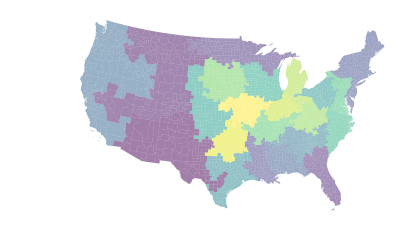

In [48]:
contig.plot('labels_',linewidth=0)
plt.gca().axis('off')
plt.show()

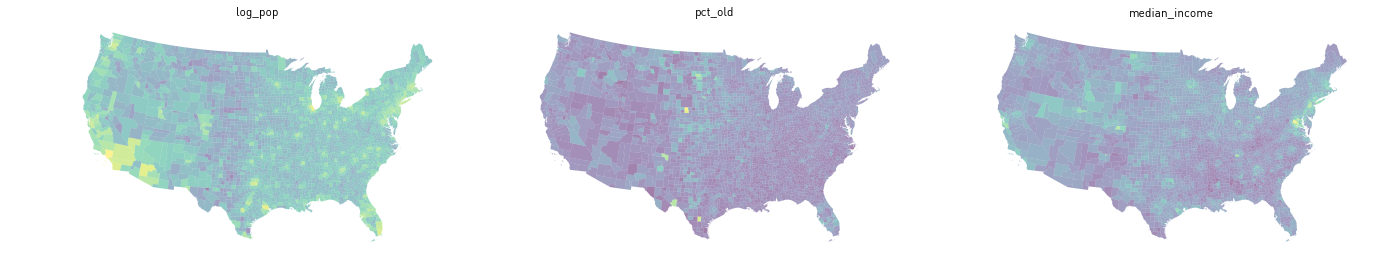

In [49]:
f,ax = plt.subplots(1,len(attributes),figsize=(4*len(attributes)*1.6,4))
for i,name in enumerate(attributes):
    contig.plot(name, linewidth=0, ax=ax[i])
    ax[i].set_title(name)
    ax[i].axis('off')
f.tight_layout()
plt.show()

In [50]:
skater_._trace[-1]

(array([ 0,  1,  1, ..., 13, 13,  1], dtype=int32),
 deletion(in_node=1327, out_node=231, score=5914.5114499296815))

In [51]:
[x[0] for x in skater_._trace]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 0], dtype=int32),
 array([0, 0, 0, ..., 7, 7, 0], dtype=int32),
 array([0, 0, 0, ..., 8, 8, 0], dtype=int32),
 array([0, 0, 0, ..., 8, 8, 0], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([0, 1, 1, ..., 9, 9, 1], dtype=int32),
 array([ 0,  1,  1, ..., 10, 10,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 11, 11,  1], dtype=int32),
 array([ 0,  1,  1, ..., 12, 12,  1], dtype=

In [52]:
labeltrace = np.vstack([i[0] for i in skater_._trace]).T

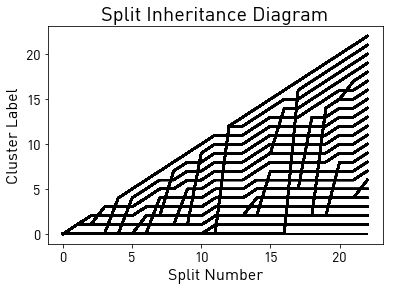

In [57]:
plt.plot(labeltrace.T, color='k', linewidth=2)
plt.title("Split Inheritance Diagram", fontsize=20)
plt.ylabel("Cluster Label", fontsize=16)
plt.xlabel("Split Number", fontsize=16)
plt.savefig('clades.png')
plt.show()

In [58]:
MST = spar.csgraph.minimum_spanning_tree(W_contig.sparse.multiply(skater_.metric(Xc)))

In [59]:
centroids = np.vstack(contig.geometry.apply(lambda x: np.hstack(x.centroid.xy)).values)
nonzeros = np.vstack(MST.nonzero()).T

# Want to force another split at a reduced quorum?

In [61]:
np.unique(skater_.current_labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22], dtype=int32),
 array([149, 170, 144, 134, 108, 155, 114, 162, 114, 101, 131, 111, 132,
        161, 136, 114, 149, 157, 162, 131, 110, 107, 153]))

In [62]:
s,n,l = skater_.find_cut(copy.deepcopy(skater_.minimum_spanning_forest_), 
                         data = Xc,
                         labels=skater_.current_labels_, 
                         quorum=50,
                         target_label=0, make=True)

In [63]:
s, n, l

(<3105x3105 sparse matrix of type '<class 'numpy.float64'>'
 	with 3081 stored elements in Compressed Sparse Row format>,
 24,
 array([ 0,  1,  1, ..., 14, 14,  1], dtype=int32))

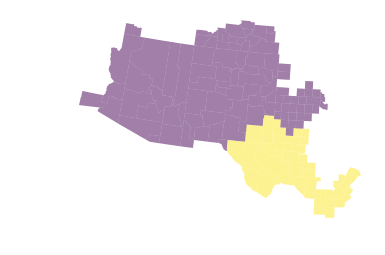

In [64]:
contig.assign(new_labels=l).query('labels_ ==0').plot('new_labels',linewidth=0)
plt.gca().axis('off')
plt.show()

# This takes forever to run, but shows the MST, target cut, and the regions at each iteation:

In [ ]:
f,ax = plt.subplots(len(labeltrace.T),1, figsize=(4*1.6, 4*len(labeltrace.T)))
for i,split in enumerate(labeltrace.T):
    deletion = skater_._trace[i][1]
    contig[['geometry']].assign(label=split).plot('label', linewidth=0, ax=ax[i])
    [ax[i].plot(*np.vstack((centroids[a], centroids[b])).T, color='k', linewidth=.5) 
     for (a,b) in nonzeros if (a != deletion.out_node) and (b != deletion.in_node)];
    if deletion.out_node is not np.nan:
        ax[i].plot(*np.vstack((centroids[deletion.out_node], centroids[deletion.in_node])).T, color='r', linewidth=2)
    ax[i].set_title(i, fontsize=20)
    ax[i].axis('off')
f.tight_layout()
plt.savefig('descendents.png', dpi=300)
plt.show()